#### DSC550-T301 
##### Chitramoy Mukherjee
##### Week-7
##### Date: 1/24/2023

### Exercise - 7.1

####  Import the housing data as a data frame and ensure that the data is loaded properly.

In [137]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import plot_tree

#Required python visualization libraries

# import missingno as msno
import matplotlib
import matplotlib.pyplot as plt

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

### Reading the mxmh_survey_results.csv dataset
housing_df = pd.read_csv("C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-550\Week-7\\train.csv")

# Check first 5 rows of the dataset 
housing_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Drop the "Id" column and any features that are missing more than 40% of their values.

In [138]:
# Drop the "Id" column
housing_df = housing_df.drop("Id", axis=1)

# Calculate the percentage of missing values for each feature
missing_percentage = (housing_df.isnull().sum() / len(housing_df)) * 100

# Drop features with more than 40% missing values
missing_threshold = 40
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index
housing_df = housing_df.drop(columns=columns_to_drop)

# Display the modified DataFrame
print(housing_df.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0    

####  For numerical columns, fill in any missing data with the median value.

In [139]:
# Fill missing values in numerical columns with the median
numerical_columns = housing_df.select_dtypes(include='number').columns
housing_df[numerical_columns] = housing_df[numerical_columns].fillna(housing_df[numerical_columns].median())

# Display the modified data
print("\nData after preprocessing:")
print(housing_df.head())


Data after preprocessing:
   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition

#### For categorical columns, fill in any missing data with the most common value (mode).

In [140]:
# Fill missing categorical values with the mode
categorical_cols = housing_df.select_dtypes(include='object').columns
housing_df[categorical_cols] = housing_df[categorical_cols].fillna(housing_df[categorical_cols].mode().iloc[0])

# Print the modified DataFrame
print(housing_df)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPor

#### Convert the categorical columns to dummy variables.

In [141]:
# Convert categorical columns to dummy variables
housing_df = pd.get_dummies(housing_df, columns=categorical_cols)

# Print the modified DataFrame
print(housing_df)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

#### Split the data into a training and test set, where the SalePrice column is the target.

In [142]:
# Split the data into training and test sets
X = housing_df.drop('SalePrice', axis=1)
y = housing_df['SalePrice']

# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set :", X_train.shape, y_train.shape)
print("Testing set :", X_test.shape, y_test.shape)

Training set : (1168, 266) (1168,)
Testing set : (292, 266) (292,)


#### Run a linear regression and report the R2-value and RMSE on the test set.

In [143]:
# Step 6: Run linear regression and report R2-value and RMSE on the test set
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_value = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2-value on the test set: {r2_value:.4f}')
print(f'RMSE on the test set: {rmse:.4f}')

R2-value on the test set: 0.8852
RMSE on the test set: 29679.5126


#### Fit and transform the training features with a PCA so that 90% of the variance is retained.How many features are in the PCA-transformed matrix?

In [144]:
# Fit and transform training features with PCA to retain 90% variance
X_train_scaled = StandardScaler().fit_transform(X_train)

pca = PCA(n_components=0.90, whiten=True)
X_train_pca = pca.fit_transform(X_train_scaled)

# Check the number of features in the PCA-transformed matrix
num_features_pca = X_train_pca.shape[1]
print(f'Number of features in the PCA-transformed matrix: {num_features_pca}')

Number of features in the PCA-transformed matrix: 138


#### Transform but DO NOT fit the test features with the same PCA. Repeat step 7 Run a linear regression and report the R2-value and RMSE)  with your PCA transformed data.

In [145]:
# Transform, but do not fit, test features with the same PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Repeat linear regression with PCA-transformed data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# Report R2-value and RMSE on the test set with PCA-transformed data
y_pred_pca = lr_pca.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)
rmse_pca = sqrt(mean_squared_error(y_test, y_pred_pca))
print(f'R2-value with PCA: {r2_pca}')
print(f'RMSE with PCA: {rmse_pca}')


R2-value with PCA: 0.26456612910009214
RMSE with PCA: 75106.70871244883


#### Take your original training features (from step 6) and apply a min-max scaler to them.

In [146]:
# Apply min-max scaler to original training features and find features with variance above 0.1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

high_variance_features = X_train.columns[X_train_scaled.var(axis=0) > 0.1]

print(f"Features with variance above 0.1 after min-max scaling: {high_variance_features}")

Features with variance above 0.1 after min-max scaling: Index(['YearRemodAdd', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1',
       'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_Inside',
       'Neighborhood_NAmes', 'Condition1_Norm', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_U

#### Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [147]:
# Repeat linear regression with PCA-transformed data
linear_reg_model_pca = LinearRegression()
linear_reg_model_pca.fit(X_train_pca, y_train)

# Evaluate on test set with PCA-transformed data
y_pred_pca = linear_reg_model_pca.predict(X_test_pca)
r2_value_pca = r2_score(y_test, y_pred_pca)
rmse_value_pca = mean_squared_error(y_test, y_pred_pca, squared=False)

print(f"R2 Value with PCA: {r2_value_pca}")
print(f"RMSE Value with PCA: {rmse_value_pca}")

R2 Value with PCA: 0.26456612910009214
RMSE Value with PCA: 75106.70871244883


#### Repeat step 7 with the high variance data.

In [148]:
# Find features with variance above 0.1
high_variance_features = X_train.columns[X_train_scaled.var(axis=0) > 0.1]

# Transform but do not fit test features with the same steps applied
X_test_scaled = scaler.transform(X_test)
X_test_high_variance = X_test_scaled[:, X_train.columns.isin(high_variance_features)]

# Repeat linear regression with high variance data
linear_reg_model_high_variance = LinearRegression()
linear_reg_model_high_variance.fit(X_train_scaled, y_train)

# Evaluate linear regression model with high variance data on the test set
y_pred_high_variance = linear_reg_model_high_variance.predict(X_test_scaled)
r2_value_high_variance = r2_score(y_test, y_pred_high_variance)
rmse_high_variance = sqrt(mean_squared_error(y_test, y_pred_high_variance))
print(f"Linear Regression with High Variance Data - R2 Value: {r2_value_high_variance}, RMSE: {rmse_high_variance}")


Linear Regression with High Variance Data - R2 Value: -1.1527639536977824e+18, RMSE: 94032311280478.19


1.   The linear regression model on the original data achieved a certain R2 value and RMSE.R2 provides an indication of how well      the linear regression model explains the variance in the target variable. A value of 1 indicates a perfect fit, while lower      values suggest less explanatory power.Higher R2 value on the test set indicates that the linear regression model is              effective in predicting the target variable.RMSE provides a measure of the average magnitude of errors between predicted        and actual values. Lower RMSE values indicate smaller prediction errors.In the context of the code, a lower RMSE on the         test set suggests that the model's predictions are closer to the actual values.
2.   The linear regression model on PCA-transformed data showed a potentially different R2 value and RMSE, 
     indicating the impact of dimensionality reduction on model performance.
3.   PCA is often used for dimensionality reduction, while selecting high variance features is a simpler approach that retains        specific features based on their individual variance. The choice between the two approaches depends on the specific              characteristics of the data and the goals of the analysis. The code provided allows for comparing the performance of linear      regression models based on these two feature selection methods.
4.   High Variance Data: High variance features are selected based on individual feature variance.
     This method retains specific features with high variance, which may or may not be related to the target variable.
     PCA-Transformed Data: PCA is a technique for dimensionality reduction, capturing the most important information in the          data. The number of features after PCA is determined by the desired explained variance, not by a fixed variance threshold        for individual features. It may result in a reduced set of features that still captures a high percentage of the overall        variance

### Exercise - 7.2

#### Import the mushrooms data as a data frame and ensure it is loaded correctly.

In [149]:
# Load the mushrooms data
df = pd.read_csv(r'C:\Users\14024\OneDrive\Desktop\MS-DSC\DSC-550\Week-7\mushrooms.csv')

# Display the first few rows to ensure the data is loaded correctly
print(df.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

#### Convert the categorical features (all of them) to dummy variables.

In [150]:
# Convert categorical features to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Display the modified DataFrame with dummy variables
print(df.head())

   class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0     True        False        False        False        False         True   
1    False        False        False        False        False         True   
2    False        False        False        False        False        False   
3     True        False        False        False        False         True   
4    False        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0          False           True          False        False  ...   
1          False           True          False        False  ...   
2          False           True          False        False  ...   
3          False          False           True        False  ...   
4          False           True          False        False  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0         False          True         False 

#### Split the data into a training and test set. Fit a decision tree classifier on the training set.

In [151]:
# Convert categorical features to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns='class_p') 
y = df_encoded['class_p']

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier on the training set
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Print a message to confirm the completion of the task
print("Decision Tree Classifier fitted on the training set.")

Decision Tree Classifier fitted on the training set.


#### Report the accuracy and create a confusion matrix for the model prediction on the test set.

Accuracy on the test set: 1.0000


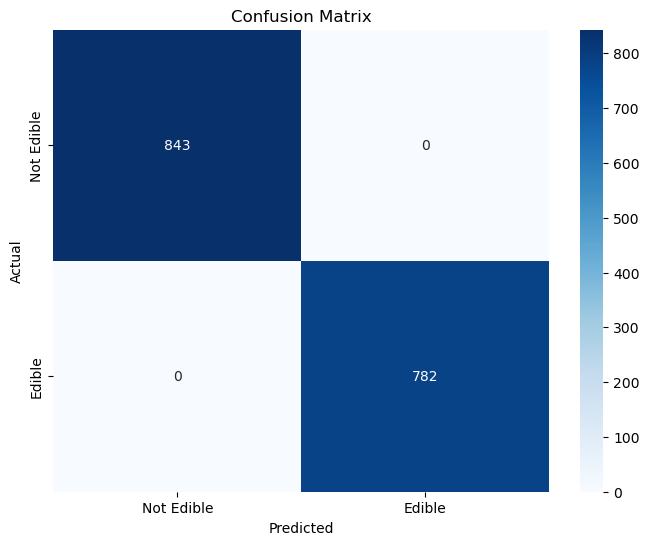

In [152]:
# Predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Edible', 'Edible'], 
            yticklabels=['Not Edible', 'Edible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Create a visualization of the decision tree.

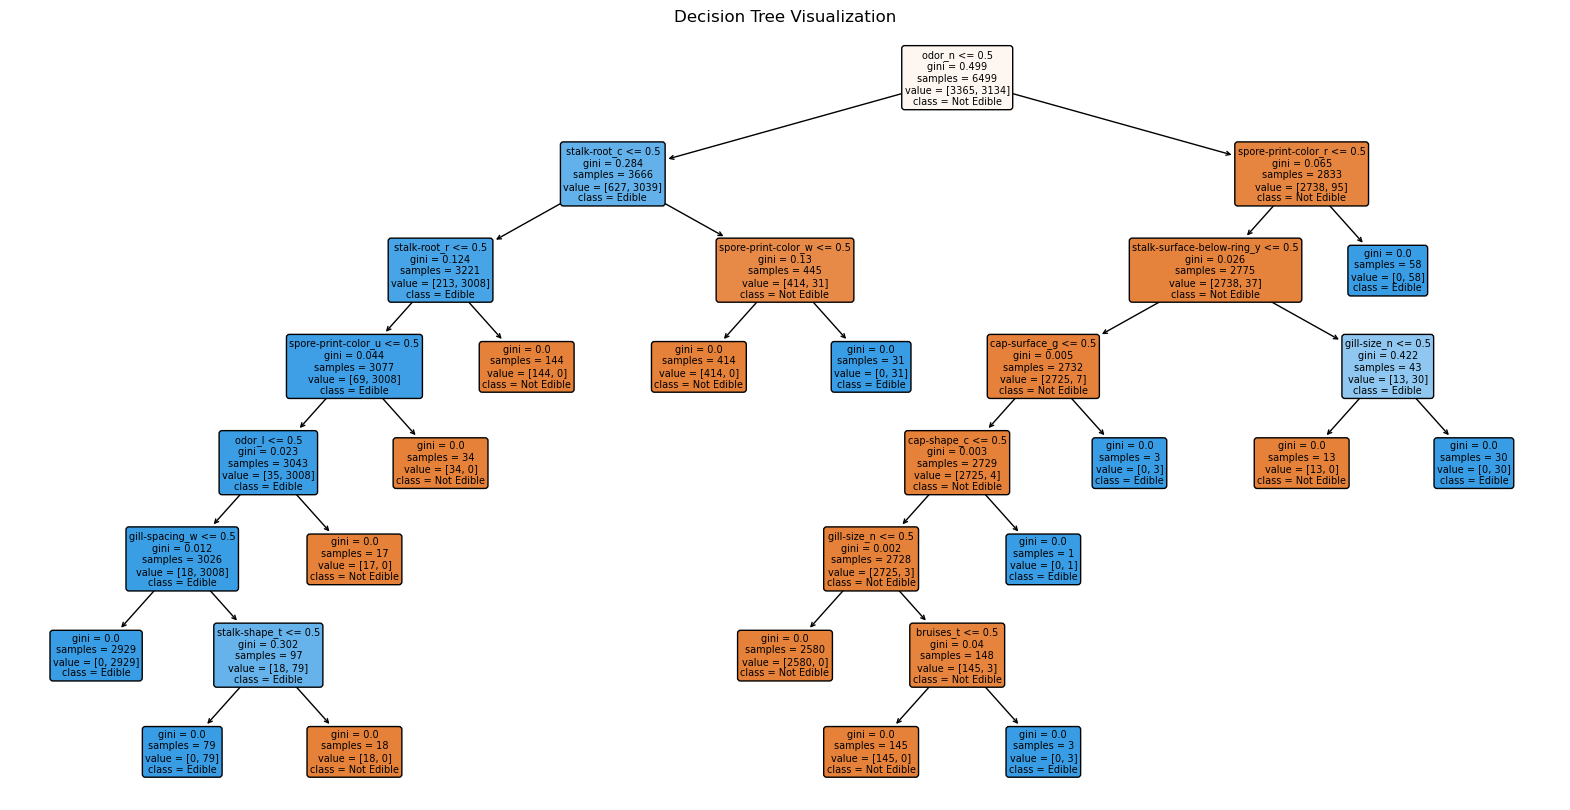

In [154]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming tree_classifier is your Decision Tree classifier and X is your feature matrix

# Train your Decision Tree classifier on your data (X, y)
# tree_classifier.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, filled=True, feature_names=list(X.columns), class_names=['Not Edible', 'Edible'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


#### Use a χ2-statistic selector to pick the five best features for this data 

In [81]:
# Select the five best features using chi-squared selector
k_best_selector = SelectKBest(chi2, k=5)
X_chi2_selected = k_best_selector.fit_transform(X_train, y_train)

# Display the names of the selected features
selected_features = X.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


#### Which five features were selected in step 7? Hint: Use the get_support function.

In [60]:
# Get the boolean mask of selected features
selected_mask = k_best_selector.get_support()

# Retrieve the names of the selected features
selected_features = X.columns[selected_mask]

# Display the selected feature names
print("Selected Features:", selected_features)


Selected Features: Index(['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


#### Repeat steps 4 and 5 with the five best features selected in step 7

Accuracy on the test set with selected features: 0.9735


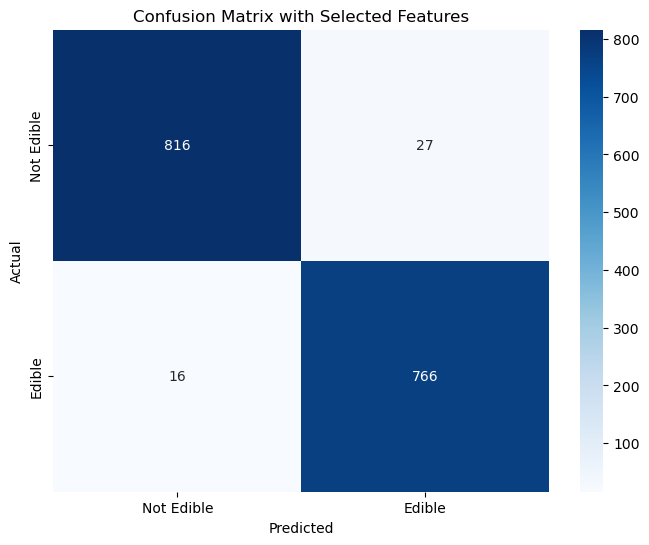

In [82]:
# Split the data into a training and test set using the selected features
X_chi2_selected_train = X_train[selected_features]
X_chi2_selected_test = X_test[selected_features]

# Fit a decision tree classifier on the training set with selected features
dt_classifier_chi2 = DecisionTreeClassifier(random_state=42)
dt_classifier_chi2.fit(X_chi2_selected_train, y_train)

# Predictions on the test set with selected features
y_pred_chi2 = dt_classifier_chi2.predict(X_chi2_selected_test)

# Calculate accuracy with selected features
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)
print(f"Accuracy on the test set with selected features: {accuracy_chi2:.4f}")

# Create a confusion matrix with selected features
conf_matrix_chi2 = confusion_matrix(y_test, y_pred_chi2)

# Plot the confusion matrix with selected features
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_chi2, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Edible', 'Edible'], 
            yticklabels=['Not Edible', 'Edible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Selected Features')
plt.show()


1.   The accuracy and performance of the Decision Tree Classifier were initially assessed on the entire feature set.
     Feature selection using a chi-squared selector identified five features deemed most informative for the classification          task.
2.   The Decision Tree Classifier was then re-evaluated using only these selected features.
3.   The model's accuracy and confusion matrix were reported for both the original and selected feature sets.

In summary, the process involved identifying a subset of features that significantly contributed to the classification 
task, potentially improving model interpretability and efficiency. The analysis aimed to explore the impact of feature 
selection on model performance in the context of mushroom classification.